# 共享单车需求预测项目
*****
[项目来自Kaggle链接](https://www.kaggle.com/c/bike-sharing-demand#description)
*****
作者：JesseZ
*****

# 目录
1. 提出问题（Business Understanding ）
2. 理解数据（Data Understanding）
 * 采集数据
 * 导入数据
 * 查看数据集信息
3. 数据清洗（Data Preparation ）
 * 数据预处理
 * 特征工程（Feature Engineering）
4. 构建模型（Modeling） 
5. 模型评估（Evaluation） 
6. 方案实施 （Deployment）
 * 提交结果到Kaggle
 * 报告撰写

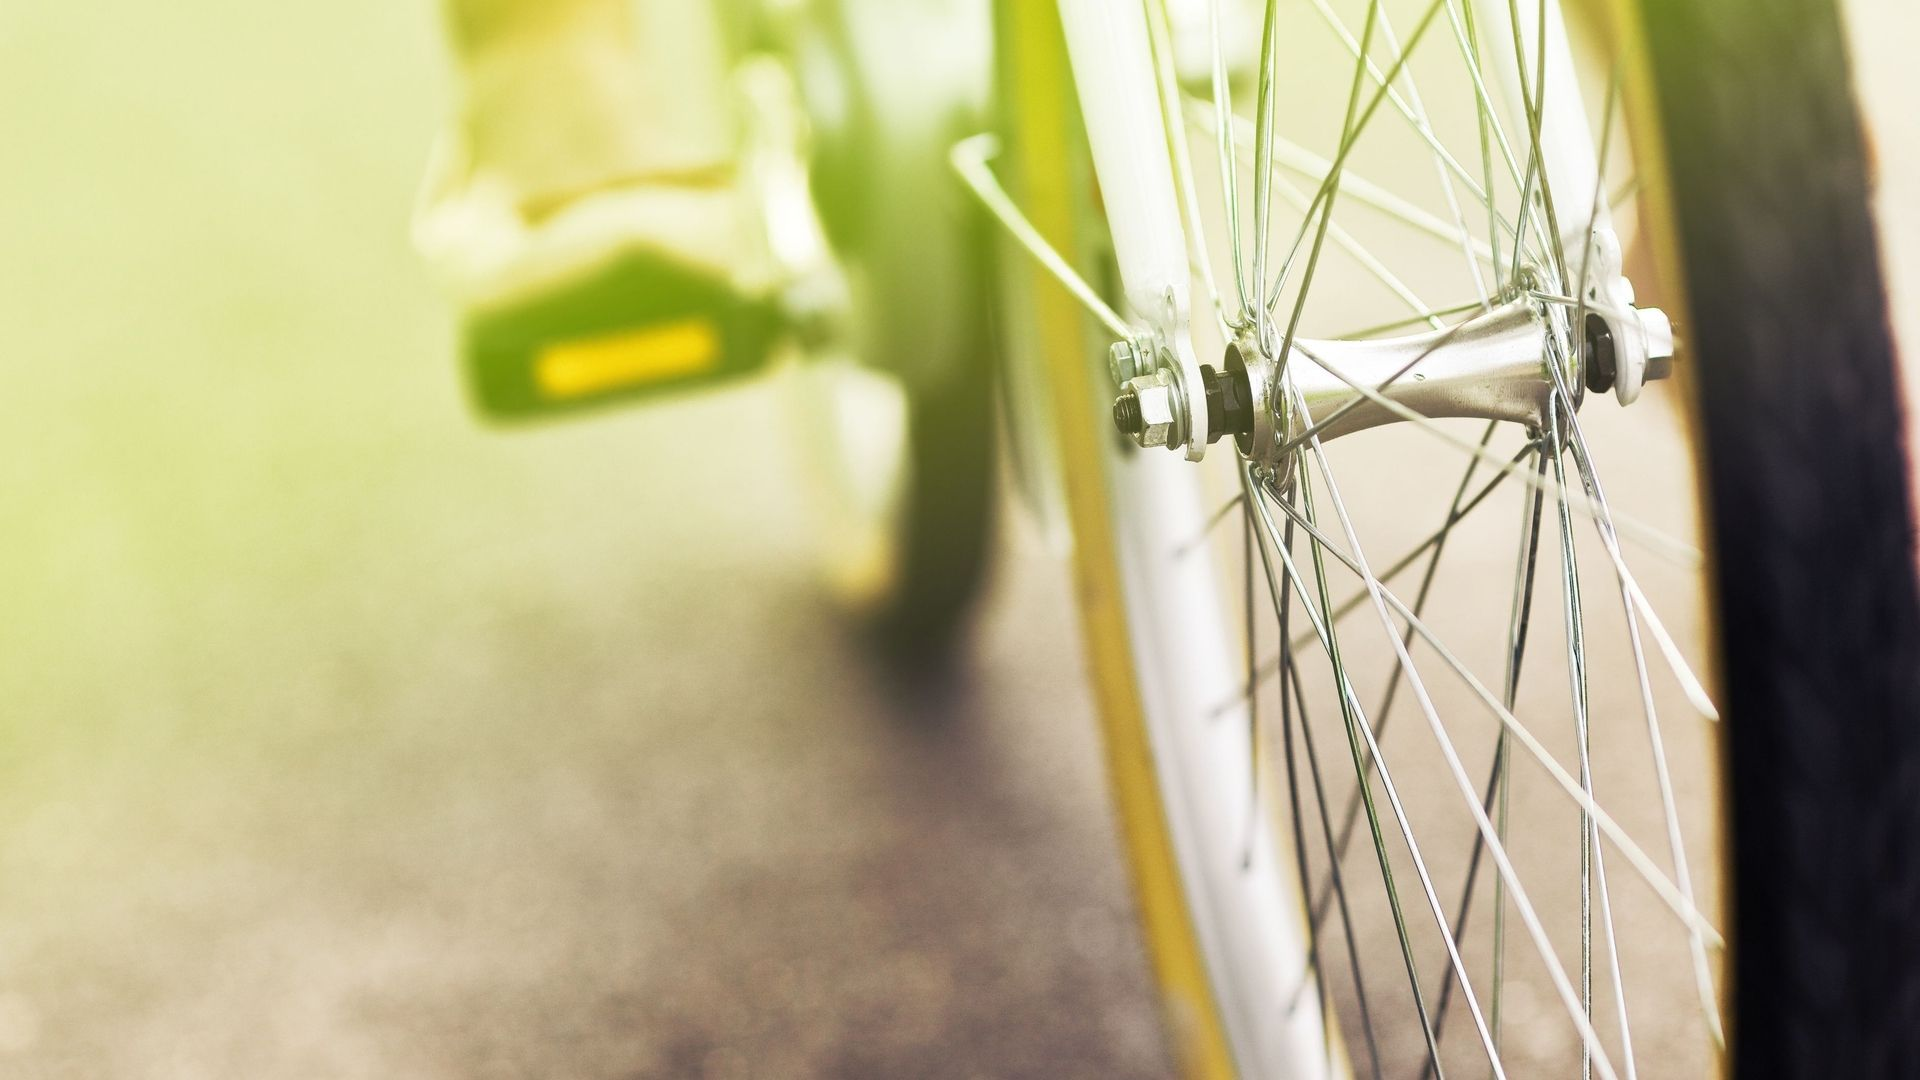

# 1.提出问题

   去年共享单车项目在国内大热，五颜六色的单车一夜之间遍布城市的各个角落。其实，早在3年前国外就有类似的项目兴起，并在Kaggle上提出项目：
   **通过历史用车记录结合天气等数据预测共享单车项目在华盛顿的需求**
>*Participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital  Bikeshare program in Washington, D.C.*

# 2.理解数据

理解数据分为三部分：

1）采集数据：这一部分，根据研究问题，采集数据

2）导入数据：你要分析的数据可能在excel文件，或者数据库中，首先，你需要将数据导入到Python中的数据结构中。

3）查看数据集信息

## 2.1 采集数据

[下载项目数据集](https://www.kaggle.com/c/bike-sharing-demand/data)

## 2.2 导入数据

In [1]:
# 忽略警告提示
import warnings
warnings.filterwarnings('ignore')

#导入处理数据包
import numpy as np
import pandas as pd

In [2]:
#导入数据
#训练数据集
train = pd.read_csv(r"C:\Users\Administrator\Desktop\Bike sharing\train.csv")
#测试数据集
test  = pd.read_csv(r"C:\Users\Administrator\Desktop\Bike sharing\test.csv")


## 2.3 查看数据集信息

In [3]:
# 1.查看数据集的大小
print ('训练数据集:',train.shape,'测试数据集:',test.shape)

训练数据集: (10886, 12) 测试数据集: (6493, 9)


In [4]:
# 2.查看各字段数据类型、缺失值9
print('训练数据集:',train.info(),'测试数据集:',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     64

In [5]:
# 3.查看数据情况
train.head()#训练数据集头

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()#测试数据集头

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


### 数据说明

Data Fields
* datetime时间 - 年月日小时  
* season季节 -  1 = spring春天, 2 = summer夏天, 3 = fall秋天, 4 = winter冬天 
* holiday节假日 - 0：否，1：是
* workingday工作日 - 该天既不是周末也不是假日（0：否，1：是）
* weather天气 - 1:晴天，2:阴天 ，3:小雨或小雪 ，4:恶劣天气（大雨、冰雹、暴风雨或者大雪）
* temp实际温度 - 摄氏度
* atemp体感温度 - 摄氏度
* humidity湿度 - 相对湿度
* windspeed风速 - 风速
* casual - 未注册用户租借数量
* registered - 注册用户租借数量
* count - 总租借数量

### 分析：
1.训练数据集：
 * 总共10886行，12列，各字段均无缺失值
 * 除时间列数据为字符串外其余都为数值型数据：时间的数据格式需要转换为时间序列，进一步处理得到日期和星期的时间数据
 * count=casual+registered，要探求影响租车量的因素，因而这两列可删去
*****
2.测试数据集：
 * 总共6493行，9列，各字段均无缺失值
 * 测试数据集完整无需预处理

# 3.数据清洗（Data Preparation ）

## 3.1 特征工程

In [7]:
#先备份测试数据集
bikeDf=train

### 时间特征处理
对于租车量的需求分析，必然需要通过不同纬度的时间来进行分析：
* 创建新的列：小时hour，天date，星期week，月份month

In [8]:
from datetime import datetime

In [9]:
#月份
def get_month(x):
    dateStr=x.split()[0]
    dateDT=datetime.strptime(dateStr,"%Y-%m-%d")
    month=dateDT.month
    return month

In [10]:
bikeDf['month']=bikeDf.datetime.apply(get_month)
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [11]:
#星期
def get_weekday(x):
    dateStr=x.split()[0]
    dateDT=datetime.strptime(dateStr,"%Y-%m-%d")
    week_day=dateDT.weekday()
    return week_day

In [12]:
bikeDf['weekday']=bikeDf.datetime.apply(get_weekday)
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5


In [13]:
#天date
bikeDf['date']=bikeDf.datetime.apply(lambda x: x.split()[0])
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01


In [14]:
#小时 hour
def get_hour(x):
    hour=x.split()[1].split(":")[0]
    int_hour=int(hour) # 注意，这里的hour要转换为数值型，因为字符串型在排序时不按数值型排序规则来
    return int_hour


In [15]:
bikeDf['hour']=bikeDf.datetime.apply(get_hour)
bikeDf.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2011-01-01,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,2011-01-01,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,2011-01-01,4


In [16]:
bikeDf.drop('datetime',axis=1,inplace=True)#删去datetime列
bikeDf.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1


## 3.2 特征选择

In [17]:
#相关系数
correlation=bikeDf.corr()
correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,-0.024804,0.146631
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.246959,0.302045
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,-0.084427,0.380540


## 可视化分析

### 3.2.1 相关系数热度图

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


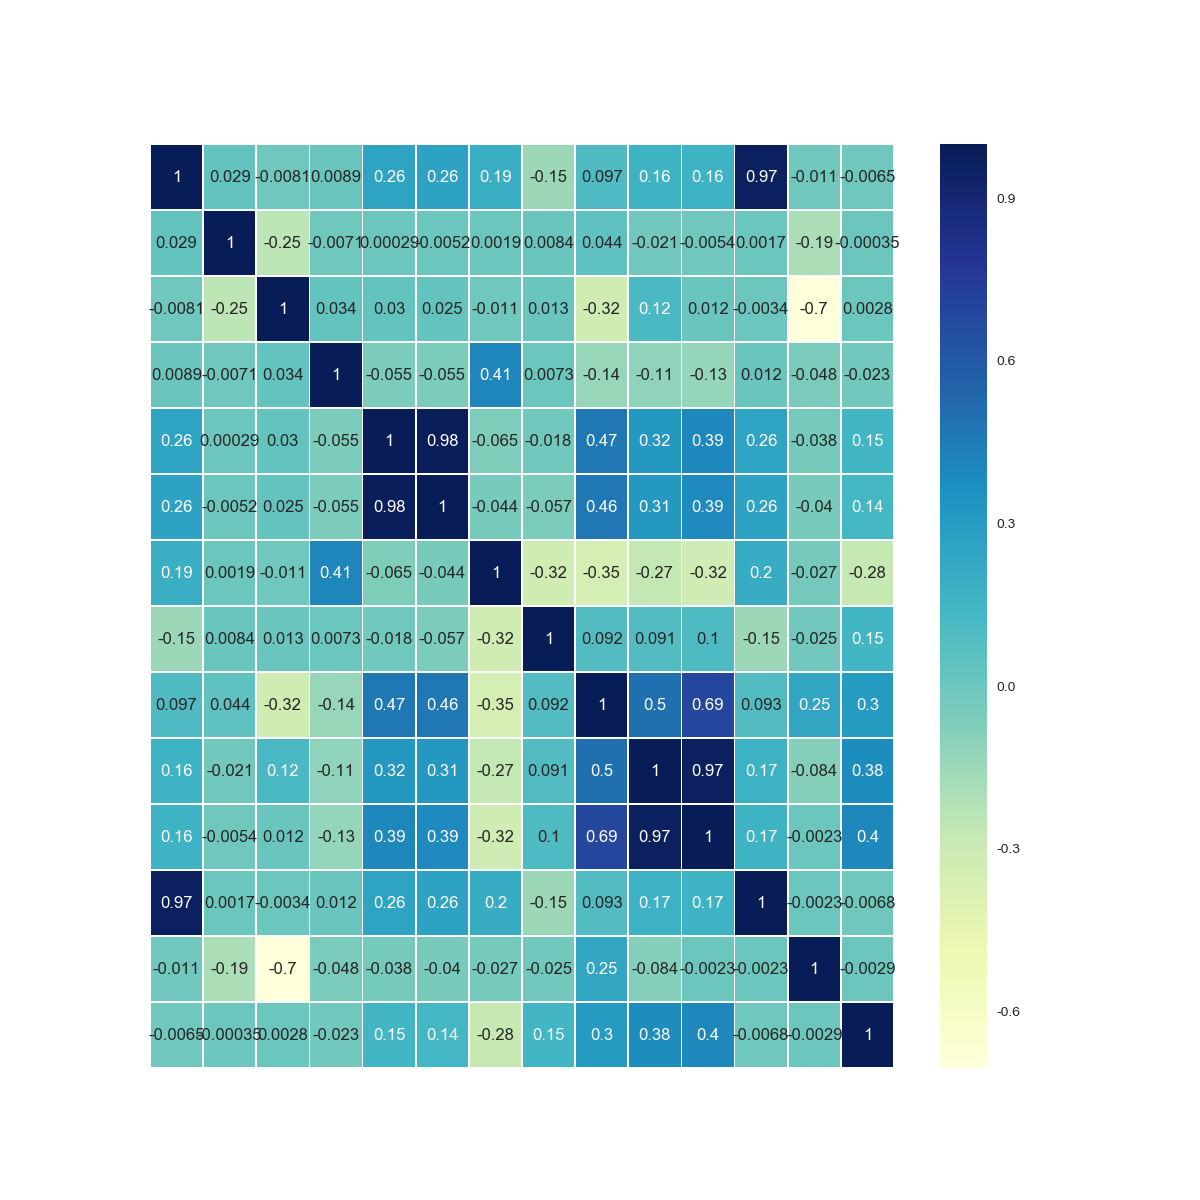

In [115]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(1,1,1)
sns.set(style='dark')
sns.heatmap(correlation,ax=ax1,vmax=1,square=False,annot=True,cmap='YlGnBu',linewidths=.5)
plt.title('Heatmap on Correlation',fontsize=30,color='white')
plt.xticks(fontsize=18,color='white',rotation=45)
plt.yticks(fontsize=18,color='white')
plt.show()

### 分析
**count：**
* 与温度成正相关，说明温度升高总产量也增加
* 与湿度成反相关，说明湿度较大时人们不愿骑车
* 与小时成正相关，说明一天中租车量与时间有线性关系；
* 温湿度等因素与季节月份相关，需进一步可视化分析各特征对count的影响

### 3.2.2 租车人数在各分类变量下的箱线图

In [116]:
# 季节变量离散化
seasonDict={1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
bikeDf['season_word']=bikeDf['season'].map(seasonDict)
bikeDf.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour,season_word,weather_word
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0,Spring,good weaher
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1,Spring,good weaher


In [117]:
#天气变量离散化
weatherDict={1:'good weaher',2:'cloudy',3:'little rainy or snowy',4:'bad weather'}
bikeDf['weather_word']=bikeDf['weather'].map(weatherDict)
bikeDf.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,weekday,date,hour,season_word,weather_word
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,2011-01-01,0,Spring,good weaher
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011-01-01,1,Spring,good weaher


<IPython.core.display.Javascript object>


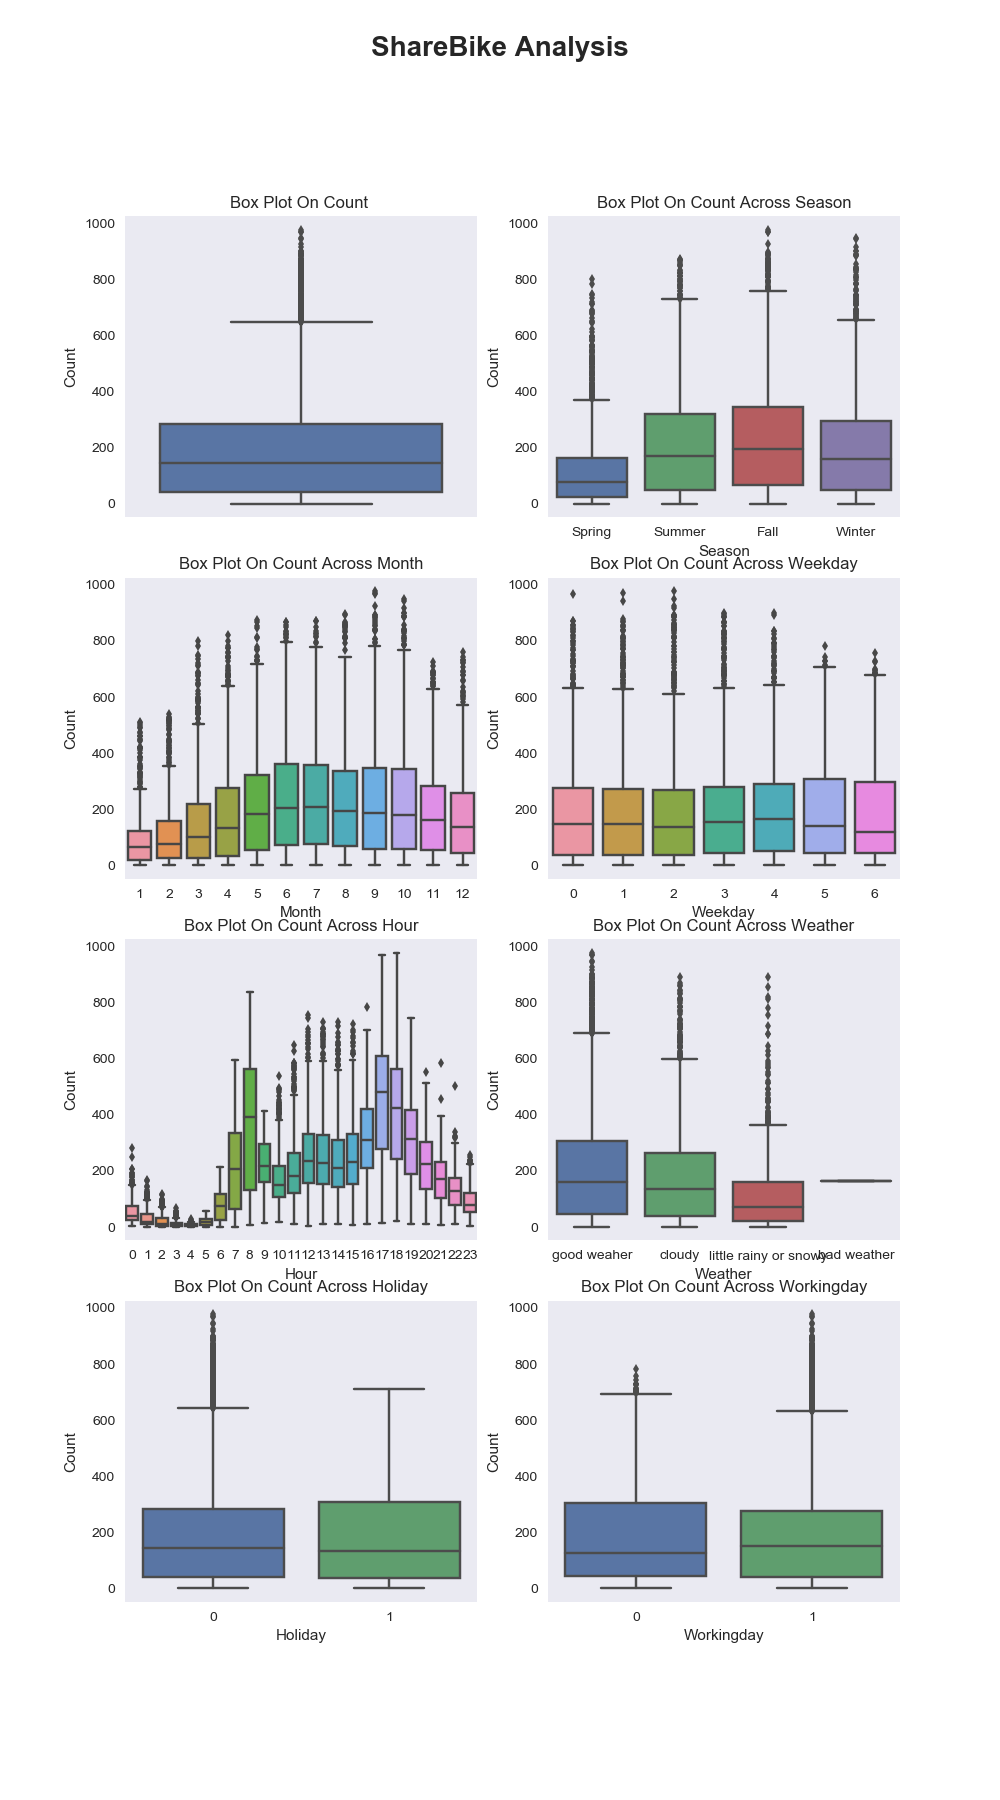

[Text(0,0.5,'Count'),
 Text(0.5,0,'Workingday'),
 Text(0.5,1,'Box Plot On Count Across Workingday')]

In [119]:
fig, axes = plt.subplots(4, 2)
fig.suptitle("ShareBike Analysis",fontsize=20,fontweight="bold")
sns.set(style='darkgrid')
fig.set_size_inches(10, 18)
ax1=sns.boxplot(data=bikeDf,y='count',orient='v',ax=axes[0][0])#count箱线图
ax2=sns.boxplot(data=bikeDf,x='season_word',y='count',orient='v',ax=axes[0][1])#季节season-count箱线图
ax3=sns.boxplot(data=bikeDf,x='month',y='count',orient='v',ax=axes[1][0])#月份month-count箱线图
ax4=sns.boxplot(data=bikeDf,x='weekday',y='count',orient='v',ax=axes[1][1])#星期weekday-count箱线图
ax5=sns.boxplot(data=bikeDf,x='hour',y='count',orient='v',ax=axes[2][0])#一天内hour-count箱线图
ax6=sns.boxplot(data=bikeDf,x='weather_word',y='count',orient='v',ax=axes[2][1])#天气weather-count箱线图
ax7=sns.boxplot(data=bikeDf,x='holiday',y='count',orient='v',ax=axes[3][0])#假期holiday-count箱线图
ax8=sns.boxplot(data=bikeDf,x='workingday',y='count',orient='v',ax=axes[3][1])#工作日workingday-count箱线图

axes[0][0].set( ylabel='Count',title="Box Plot On Count ")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Month")
axes[1][1].set(xlabel='Weekday', ylabel='Count',title="Box Plot On Count Across Weekday")
axes[2][0].set(xlabel='Hour', ylabel='Count',title="Box Plot On Count Across Hour")
axes[2][1].set(xlabel='Weather', ylabel='Count',title="Box Plot On Count Across Weather")
axes[3][0].set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holiday")
axes[3][1].set(xlabel='Workingday', ylabel='Count',title="Box Plot On Count Across Workingday")


### 从图中可以看到
* 每小时的租车人数中位数在150上下
* 夏秋季节天气温暖租车量较高
* 工作日相较于假期租车量要多一点，以及一天24小时内早高峰和晚高峰的租车量最多，说明通勤是租车的主要动机
* 显然，天气越好租车量越大

### 3.2.3 租车量在各连续变量下的可视化分析

In [58]:
hourcountAvg=bikeDf.pivot_table(index=['hour'],columns=['season_word'],values=['count'])
hourcountAvg.head()

count                                 
season_word       Fall     Spring     Summer     Winter
hour                                                   
0            75.675439  28.292035  58.473684  57.877193
1            44.831858  18.761062  35.640351  36.166667
2            31.707965  13.205607  23.482456  22.684211
3            15.778761   7.760417  11.714286  11.169643
4             8.087719   3.336634   6.628319   7.228070

<IPython.core.display.Javascript object>


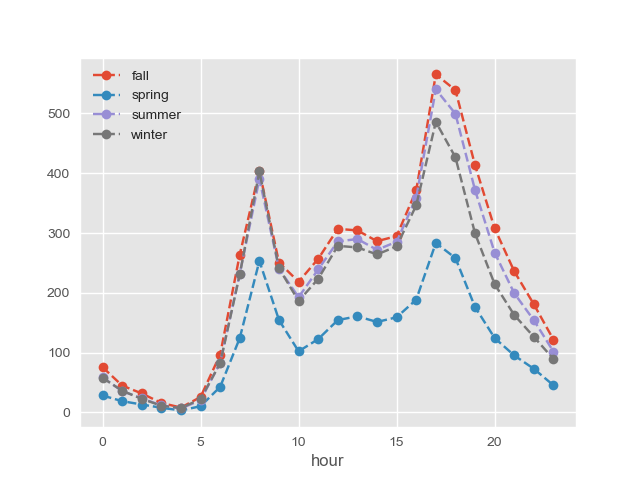

In [98]:
hourcountAvg.plot(linestyle='dashed', marker='o')
plt.legend(['fall','spring','summer','winter'])

In [73]:
hourseasonAggregated = pd.DataFrame(bikeDf.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
hourseasonAggregated.head()

,hour,season,count
0,0,1,28.292035
1,0,2,58.473684
2,0,3,75.675439
3,0,4,57.877193
4,1,1,18.761062


<IPython.core.display.Javascript object>


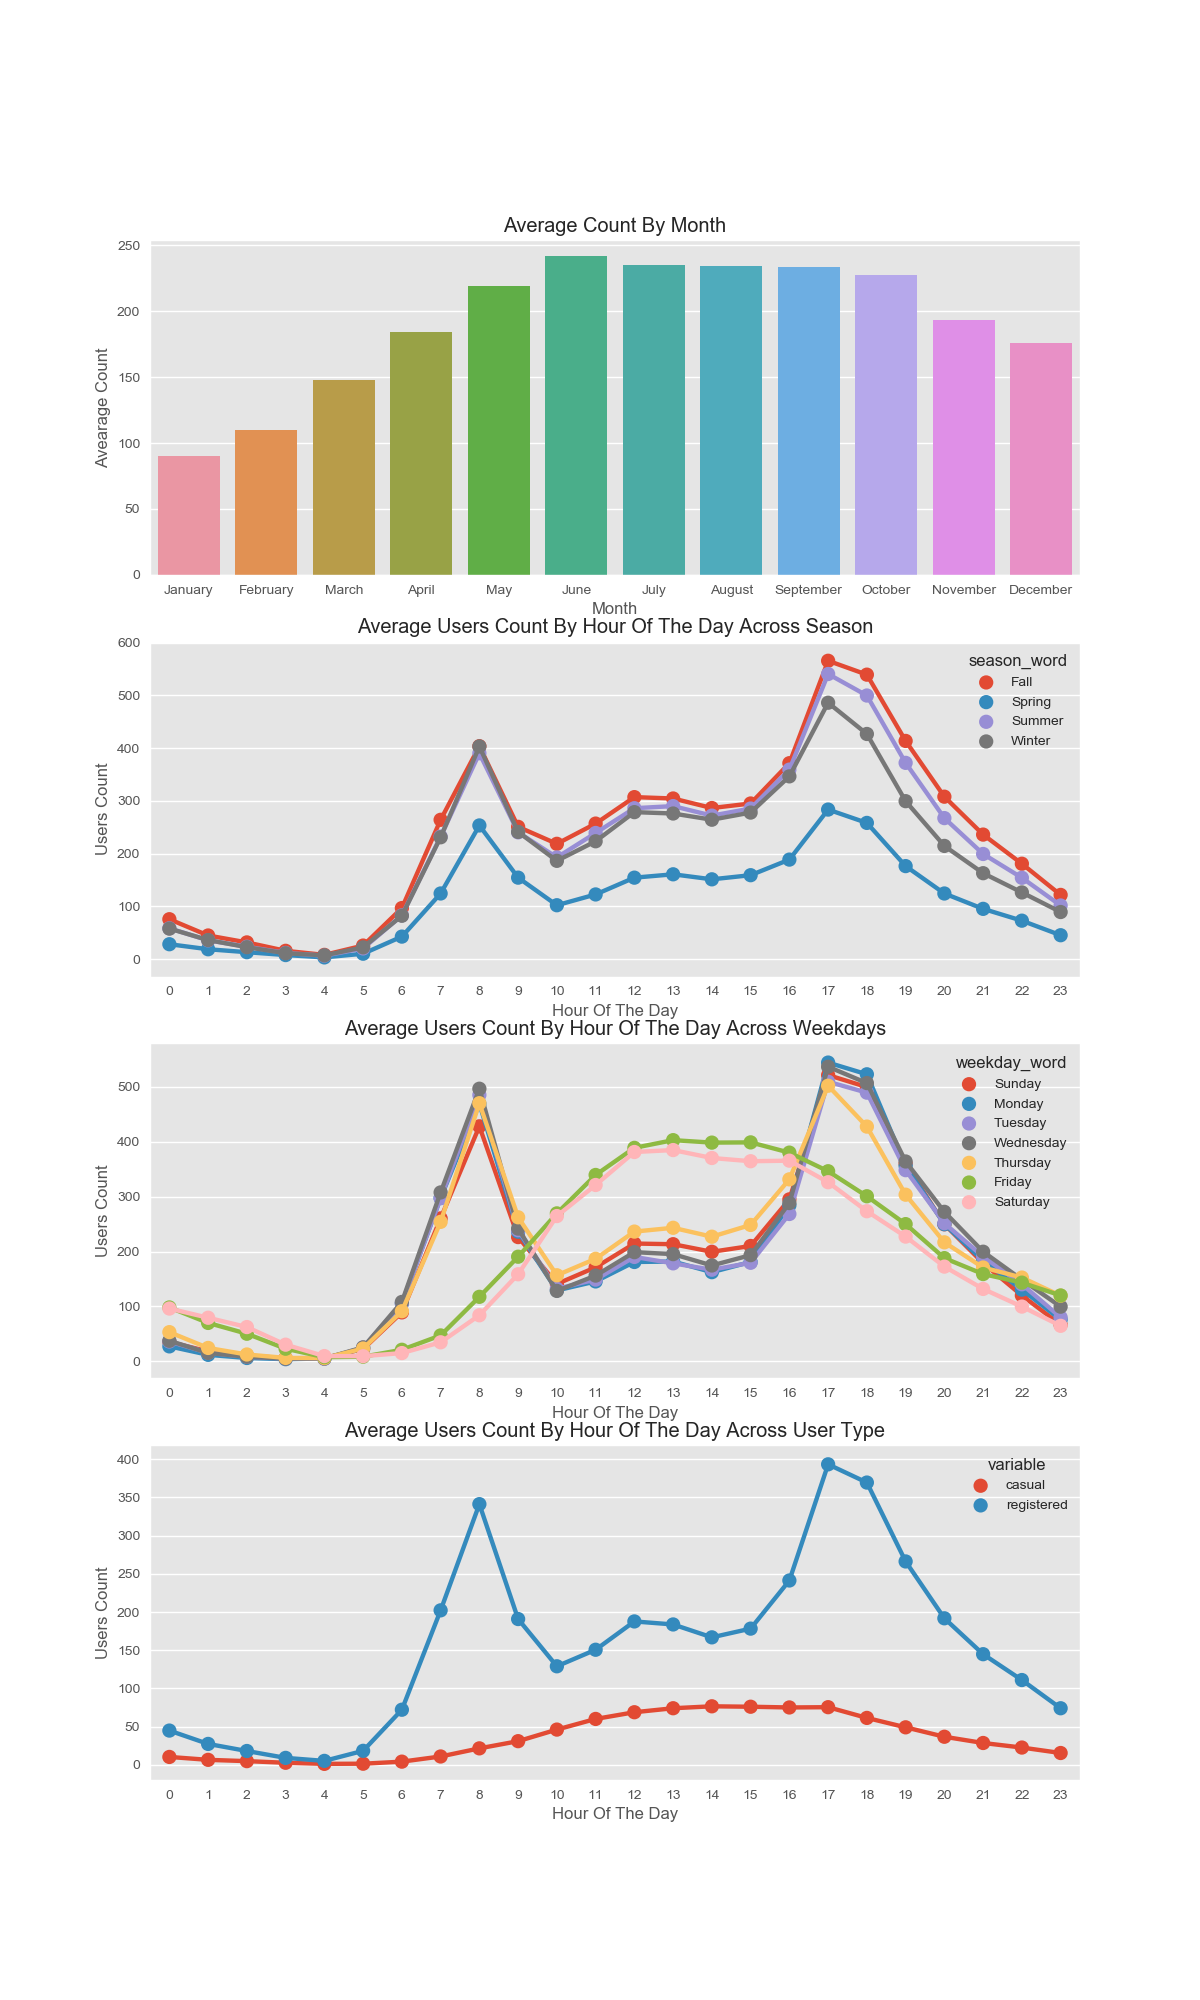

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across User Type'),
 None]

In [97]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
monthDict = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
weekDict = {0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}
#月平均租车量
monthAggregated = pd.DataFrame(bikeDf.groupby("month")["count"].mean()).reset_index()
monthAggregated["month_word"]=monthAggregated["month"].map(monthDict)
sns.barplot(data=monthAggregated,x="month_word",y="count",ax=ax1)#order=sortOrder
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
#不同季节每天的平均租车量
hourseasonAggregated = pd.DataFrame(bikeDf.groupby(["hour","season_word"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourseasonAggregated["hour"], y=hourseasonAggregated["count"],hue=hourseasonAggregated["season_word"], data=hourseasonAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

#每星期每天平均租车量
hourweekAggregated = pd.DataFrame(bikeDf.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
hourweekAggregated["weekday_word"]=hourweekAggregated["weekday"].map(weekDict)
sns.pointplot(x=hourweekAggregated["hour"], y=hourweekAggregated["count"],hue=hourweekAggregated["weekday_word"], data=hourweekAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

#每天租车的不同用户类型
hourTransformed = pd.melt(bikeDf[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
houruserAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=houruserAggregated["hour"], y=houruserAggregated["value"],hue=houruserAggregated["variable"],hue_order=["casual","registered"], data=houruserAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')


* 五月到十月（即夏季和秋季）租车量较多
* 租车以通勤为主

### 3.2.4 温度、湿度以及风速的影响

<IPython.core.display.Javascript object>


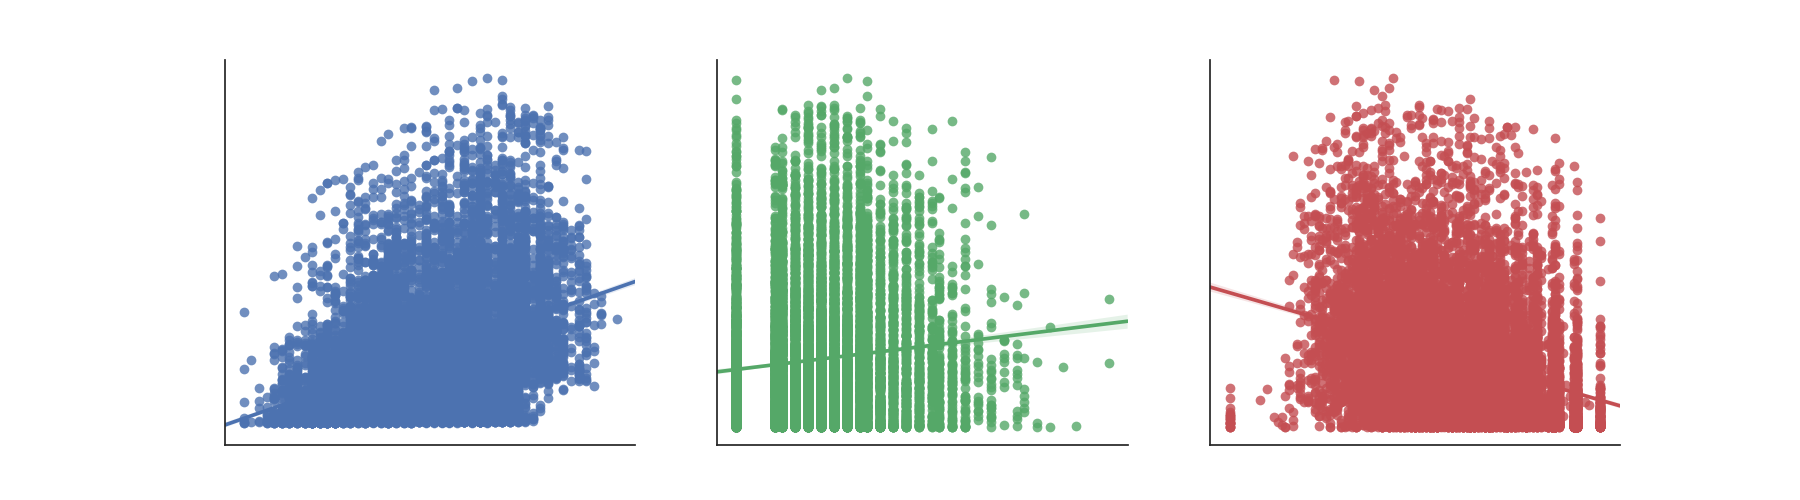

In [160]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(18, 5)
sns.set(style='white')
sns.despine()
ax1=sns.regplot(x="temp", y="count", data=bikeDf,ax=ax1)
ax2=sns.regplot(x="windspeed", y="count", data=bikeDf,ax=ax2)
ax3=sns.regplot(x="humidity", y="count", data=bikeDf,ax=ax3)

#ax1.set(xlabel='temp',ylabel='count')
ax1.set_xlabel('temp',color='white',fontsize=15)
ax1.set_ylabel('count',color='white',fontsize=15)
ax2.set_xlabel('windspeed',color='white',fontsize=15)
ax2.set_ylabel('count',color='white',fontsize=15)
ax3.set_xlabel('humidity',color='white',fontsize=15)
ax3.set_ylabel('count',color='white',fontsize=15)

ax1.tick_params(colors='white',labelsize=10, labelcolor='white')
ax2.tick_params(colors='white',labelsize=10, labelcolor='white')
ax3.tick_params(colors='white',labelsize=10, labelcolor='white')


* 气温低于10，高于30度，租车人数较少-太冷太热都会抑制租车需求
* 风速越大，租车人数越少-大风抑制租车需求
* 空气湿度越高，租车人数越少-干爽的天气骑车比较舒适



<IPython.core.display.Javascript object>


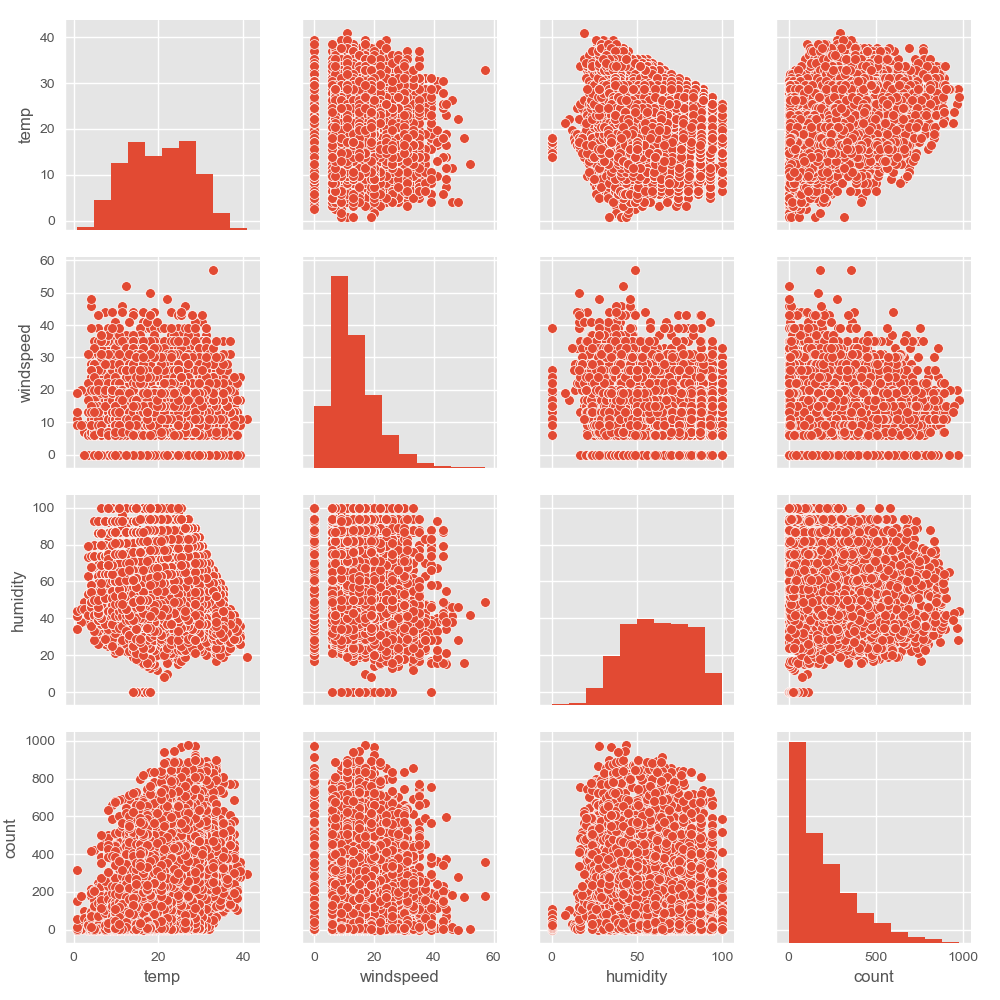

In [105]:
# 尝试多变量图
sns.pairplot(bikeDf[['temp','windspeed','humidity','count']])